<img src="https://artedosdados.com.br/assets/media/arte_dos_dados_fundo_branco.png" alt="Arte dos Dados" width="150">

# **Projeto do curso 3: Engenharia de dados**
Professor: Nelio Machado | 👤 Marlon Roberto Dias Soares

-----------------

## **Descrição do entregável do curso 3 (Engenharia de Dados)**
1. Objetivo: Carregar os dados do Titanic no *Databricks* e analisar os dados usando Python.
2. Fonte dos dados: Titanic, que pode ser encontrado no Kaggle ou várias outras fontes de dados
--------

In [1]:
import pandas as pd

# Carregar o arquivo
file_path = '/content/Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Exibir as 5 primeiras linhas para verificar os dados
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **2. Redefinir a coluna Survived**
A coluna `Survived` possui os valores `{0, 1}`. Vamos substituir esses valores para `{“Não_Sobreviveu”, “Sobreviveu”}`.

In [2]:
# Substituir os valores de 'Survived'
titanic_df['Survived'] = titanic_df['Survived'].replace({0: 'Não_Sobreviveu', 1: 'Sobreviveu'})

# Verificar as mudanças
titanic_df[['Survived']].head()


,Survived
0,Não_Sobreviveu
1,Sobreviveu
2,Sobreviveu
3,Sobreviveu
4,Não_Sobreviveu


## **3. Deletar as colunas `PassengerId` e `Ticket`**
Estas colunas não são relevantes para a análise, então vamos removê-las do DataFrame.

In [3]:
# Deletar as colunas 'PassengerId' e 'Ticket'
titanic_df = titanic_df.drop(columns=['PassengerId', 'Ticket'])

# Verificar se as colunas foram removidas
titanic_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Não_Sobreviveu,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,Sobreviveu,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,Sobreviveu,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,Sobreviveu,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,Não_Sobreviveu,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


##**4. Verificar valores ausentes**
Aqui, calculamos a quantidade de valores ausentes em cada coluna e identificamos a coluna com maior número de valores ausentes.

In [4]:
# Verificar a quantidade de valores ausentes por coluna
missing_values = titanic_df.isnull().sum()

# Exibir os resultados
print("Valores ausentes por coluna:")
print(missing_values)

# Identificar a coluna com maior número de valores ausentes
coluna_maior_missing = missing_values.idxmax()
print(f"\nA coluna com maior número de valores ausentes é: {coluna_maior_missing} ({missing_values[coluna_maior_missing]} valores ausentes)")


Valores ausentes por coluna:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

A coluna com maior número de valores ausentes é: Cabin (687 valores ausentes)


### **5. Tratamento dos missing values**

- **`Age` (177 valores ausentes):** Como é uma variável contínua, podemos preencher com a **média** ou **mediana**.
- **`Cabin` (687 valores ausentes):** A maior parte dos valores está ausente, então faz sentido **remover essa coluna** por não agregar informações significativas.
- **`Embarked` (2 valores ausentes):** É uma variável categórica. Podemos preencher os valores ausentes com o **modo** (categoria mais frequente).

In [5]:
# Tratando os valores ausentes
# 1. Preencher valores ausentes de 'Age' com a média
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

# 2. Remover a coluna 'Cabin'
titanic_df.drop(columns=['Cabin'], inplace=True)

# 3. Preencher valores ausentes de 'Embarked' com o modo
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Verificar novamente os valores ausentes
print("Valores ausentes após o tratamento:")
print(titanic_df.isnull().sum())


Valores ausentes após o tratamento:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<ipython-input-5-0bf49f20a198>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
<ipython-input-5-0bf49f20a198>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

### **6. Estatísticas descritivas**
Vamos calcular as seguintes estatísticas para as colunas numéricas do DataFrame:
- `count`
- `mean`
- `std`
- `min`
- `25%`, `50%` (mediana), `75%`
- `max`
- `skew` (assimetria)
- `kurt` (curtose)

---

### Interpretação
Após executar o código:
1. **Valores de `mean` e `std`:** Eles indicam a média e o desvio padrão, respectivamente.
2. **Assimetria (`skew`):**
   - Valores próximos de 0 indicam simetria.
   - Valores positivos indicam assimetria à direita.
   - Valores negativos indicam assimetria à esquerda.
3. **Curtose (`kurt`):**
   - Valores maiores que 0 indicam que os dados têm caudas mais pesadas que uma distribuição normal.
   - Valores menores que 0 indicam caudas mais leves.

In [6]:
# Estatísticas descritivas básicas
estatisticas = titanic_df.describe()

# Calcular skew e kurt (assimetria e curtose)
estatisticas.loc['skew'] = titanic_df.skew(numeric_only=True)
estatisticas.loc['kurt'] = titanic_df.kurt(numeric_only=True)

# Exibir estatísticas descritivas
print(estatisticas)


           Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   13.002015    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   22.000000    0.000000    0.000000    7.910400
50%      3.000000   29.699118    0.000000    0.000000   14.454200
75%      3.000000   35.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200
skew    -0.630548    0.434488    3.695352    2.749117    4.787317
kurt    -1.280015    0.966279   17.880420    9.778125   33.398141


---

### **Desse modo, podemos interpretrar os dados como:**
1. **`Pclass` (Classe do passageiro):**
   - Média: 2,31 → A maioria dos passageiros estava na 2ª ou 3ª classe.
   - Assimetria (`skew`): -0,63 → Distribuição levemente assimétrica à esquerda, indicando mais passageiros na 3ª classe.
   - Curtose (`kurt`): -1,28 → Caudas mais leves que o esperado, indicando uma distribuição mais achatada.

2. **`Age` (Idade):**
   - Média: 29,7 anos → Os passageiros tinham em média cerca de 30 anos.
   - Assimetria: 0,43 → Leve assimetria à direita, indicando mais pessoas jovens no conjunto de dados.
   - Curtose: 0,97 → Caudas um pouco mais pesadas, sugerindo extremos.

3. **`SibSp` (Irmãos/cônjuges a bordo):**
   - Assimetria: 3,70 → Distribuição fortemente assimétrica à direita; a maioria tinha poucos ou nenhum acompanhante.
   - Curtose: 17,88 → Valores muito extremos (outliers) no conjunto.

4. **`Parch` (Pais/filhos a bordo):**
   - Assimetria: 2,75 → Assimetria significativa à direita.
   - Curtose: 9,78 → Valores extremos também presentes.

5. **`Fare` (Tarifa paga):**
   - Média: 32,2 → A tarifa média foi 32,2 unidades monetárias.
   - Assimetria: 4,78 → Altamente assimétrica à direita, indicando que algumas pessoas pagaram valores muito elevados.
   - Curtose: 33,39 → Valores extremamente extremos (outliers muito altos).

## 7. Matriz de correlação
A matriz de correlação nos ajuda a entender as relações lineares entre as variáveis. Valores próximos de:

> * 1 ou -1: Forte correlação positiva ou negativa.
> * 0: Nenhuma correlação linear.

Para tal, vamos usar o método corr() e visualizar a matriz.

Matriz de correlação:
          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age    -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp   0.083081 -0.232625  1.000000  0.414838  0.159651
Parch   0.018443 -0.179191  0.414838  1.000000  0.216225
Fare   -0.549500  0.091566  0.159651  0.216225  1.000000


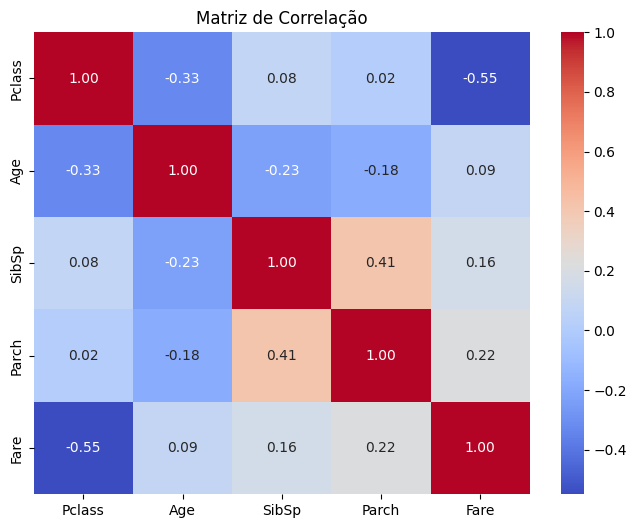

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = titanic_df.corr(numeric_only=True)

# Exibir a matriz de correlação
print("Matriz de correlação:")
print(correlation_matrix)

# Visualizar com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


---

### **Análise das correlações:**
1. **`Pclass` (Classe do passageiro):**
   - Alta correlação positiva com `Fare` (1.0): Naturalmente, passageiros em classes mais altas (1ª classe) pagaram tarifas significativamente maiores que os demais.
   - Correlação negativa com `Age` (-0.33): Passageiros mais jovens tendem a estar em classes inferiores.

2. **`Age` (Idade):**
   - Correlação negativa com `SibSp` (-0.23): Pessoas mais velhas geralmente viajam com menos irmãos/cônjuges.
   - Correlação negativa com `Parch` (-0.18): Pessoas mais velhas viajam menos com pais/filhos.

3. **`Fare` (Tarifa paga):**
   - Positiva com `Parch` (0.22) e `SibSp` (0.16): Quem viajava em grupo pagava, em média, tarifas mais altas.

---

### No geral...
A relação mais forte é entre **`Pclass` e `Fare`**, indicando que a classe social influenciava diretamente no custo da viagem. Outras variáveis, como `SibSp` e `Parch`, apresentam correlações fracas.

VOLTAR DEPOIS PARA ENTENDER SOBREVIVENTES

In [8]:
import pandas as pd

# Garantir que 'Survived' esteja em formato numérico
titanic_df['Survived'] = titanic_df['Survived'].map({'Não_Sobreviveu': 0, 'Sobreviveu': 1})

# Selecionar apenas colunas numéricas
titanic_df_numerico = titanic_df.select_dtypes(include=['number'])

# Recalcular a matriz de correlação
correlacao = titanic_df_numerico.corr()

# Exibir apenas a correlação com 'Survived'
correlacao_com_survived = correlacao['Survived'].sort_values(ascending=False)
print("Correlação com 'Survived':")
print(correlacao_com_survived)


Correlação com 'Survived':
Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64


Matriz de correlação:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.069809 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.331339  0.083081  0.018443 -0.549500
Age      -0.069809 -0.331339  1.000000 -0.232625 -0.179191  0.091566
SibSp    -0.035322  0.083081 -0.232625  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.179191  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.091566  0.159651  0.216225  1.000000


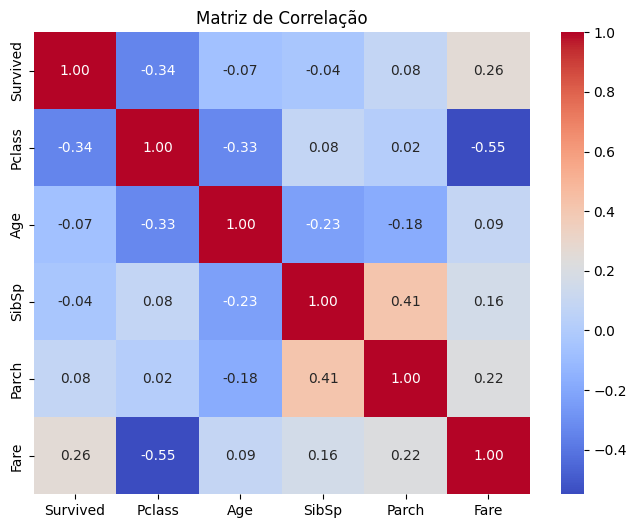

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlação
correlation_matrix = titanic_df.corr(numeric_only=True)

# Exibir a matriz de correlação
print("Matriz de correlação:")
print(correlation_matrix)

# Visualizar com um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Com base nessa nova matriz de correlação, podemos analisar as colunas que possuem **alta correlação** e **fraca correlação** com a coluna `'Survived'`.

### **Altamente correlacionadas:**
- **'Pclass' e 'Survived'**: Correlação de **-0.338**.
  - Existe uma correlação moderada negativa entre a classe (`Pclass`) e a sobrevivência. Ou seja, quanto maior a classe (geralmente mais alta), maior a chance de sobrevivência.
  
- **'Fare' e 'Survived'**: Correlação de **0.257**.
  - Existe uma correlação moderada positiva entre a tarifa paga (`Fare`) e a sobrevivência. Quem pagou uma tarifa mais alta teve mais chance de sobreviver.

### **Fraca correlação com 'Survived':**
- **'Age' e 'Survived'**: Correlação de **-0.069**.
  - A correlação é muito fraca e praticamente insignificante. A idade tem uma relação muito fraca com a sobrevivência.
  
- **'SibSp' e 'Survived'**: Correlação de **-0.035**.
  - A correlação entre o número de irmãos/cônjuges a bordo (`SibSp`) e a sobrevivência é muito fraca.

- **'Parch' e 'Survived'**: Correlação de **0.081**.
  - A correlação entre o número de pais/filhos a bordo (`Parch`) e a sobrevivência é fraca, mas positiva.

### Resumo:
- **Altamente correlacionadas** com a sobrevivência: `'Pclass'` e `'Fare'` (moderadamente).
- **Fraca correlação** com a sobrevivência: `'Age'`, `'SibSp'` e `'Parch'`.

##8. Porcentagem de sobrevivência por gênero
Vamos dividir os dados por gênero e calcular a porcentagem de sobreviventes para homens e mulheres.

Porcentagem de sobrevivência por gênero:
Survived          0          1
Sex                           
female    25.796178  74.203822
male      81.109185  18.890815


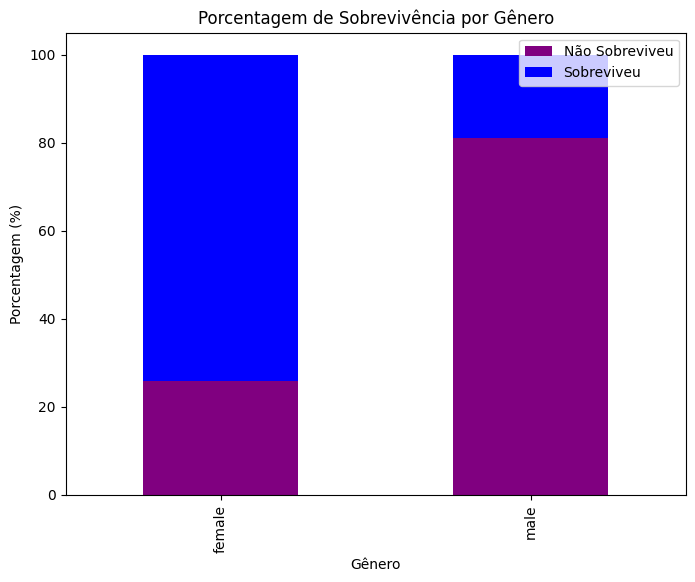

In [10]:
# Filtrar os dados por gênero
sobreviventes_por_genero = titanic_df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

# Multiplicar por 100 para obter a porcentagem
sobreviventes_por_genero *= 100

# Exibir os resultados
print("Porcentagem de sobrevivência por gênero:")
print(sobreviventes_por_genero)

# Exemplo visual
sobreviventes_por_genero.plot(kind='bar', stacked=True, figsize=(8, 6), color=['purple', 'blue'])
plt.title("Porcentagem de Sobrevivência por Gênero")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Gênero")
plt.legend(["Não Sobreviveu", "Sobreviveu"])
plt.show()


---

### **Com isso, temos que:**
1. **Mulheres (`female`):**
   - **Sobreviventes:** 74,20%
   - **Não sobreviventes:** 25,80%

2. **Homens (`male`):**
   - **Sobreviventes:** 18,89%
   - **Não sobreviventes:** 81,11%


**Conclusão:** A maioria das mulheres sobreviveu, evidenciando a política de "mulheres e crianças primeiro" adotada durante o desastre.

## 9. Média do valor pago (Fare) por sexo

In [11]:
# Calcular a média do valor pago por sexo
media_fare_por_sexo = titanic_df.groupby('Sex')['Fare'].mean()

# Exibir os resultados
print("Média do valor pago por sexo:")
print(media_fare_por_sexo)


Média do valor pago por sexo:
Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64


---

### **Interpretação**
1. **Mulheres (`female`):**
   - Média do valor pago: **44,48**.

2. **Homens (`male`):**
   - Média do valor pago: **25,52**.

### **Possíveis razões:**
- Mulheres podem ter viajado em maior proporção nas classes superiores (`Pclass`), onde as tarifas eram mais caras.
- Algumas mulheres podem ter sido acompanhadas por familiares, o que também influencia no valor total pago.
- Pode ter havido uma cobrança adicional em função de bens como joias.


## 10. Média do valor pago (`Fare`) por classe (`Pclass`)

In [12]:
# Calculando a média do valor pago por classe
media_fare_por_classe = titanic_df.groupby('Pclass')['Fare'].mean()

# Exibir os resultados
print("Média do valor pago por classe:")
print(media_fare_por_classe)


Média do valor pago por classe:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


1. **1ª Classe (`Pclass = 1`):**
   - Média do valor pago: **84,15**.
   - Passageiros da 1ª classe pagaram tarifas significativamente mais altas, evidenciando o luxo e os privilégios associados a essa classe.

2. **2ª Classe (`Pclass = 2`):**
   - Média do valor pago: **20,66**.
   - Tarifas bem mais acessíveis do que a 1ª classe, indicando menos comodidades.

3. **3ª Classe (`Pclass = 3`):**
   - Média do valor pago: **13,68**.
   - A classe mais popular e acessível, geralmente ocupada por passageiros de condições econômicas mais modestas.


**Conclusão:**
A diferença significativa nos valores pagos reforça como a **classe social** influenciava diretamente no custo da viagem e nas condições oferecidas. Isso também ajuda a explicar as altas tarifas médias pagas por mulheres, já que muitas viajaram na 1ª classe.

##11. Média do valor pago (`Fare`) por local de embarque (`Embarked`)

In [13]:
# Calculando a média do valor pago por local de embarque
media_fare_por_embarque = titanic_df.groupby('Embarked')['Fare'].mean()

# Exibir os resultados
print("Média do valor pago por local de embarque:")
print(media_fare_por_embarque)


Média do valor pago por local de embarque:
Embarked
C    59.954144
Q    13.276030
S    27.243651
Name: Fare, dtype: float64


---

### **Interpretação**
1. **Cherbourg (`C`):**
   - Média do valor pago: **59,95**.
   - Os passageiros que embarcaram em `Cherbourg` pagaram, em média, tarifas significativamente mais altas, indicando que muitos eram de classes socioeconômicas superiores ou possuíam maior poder aquisitivo.

2. **Queenstown (`Q`):**
   - Média do valor pago: **13,28**.
   - Passageiros de `Queenstown` pagaram as tarifas mais baixas, sugerindo que eram majoritariamente da 3ª classe e de condições econômicas mais modestas.

3. **Southampton (`S`):**
   - Média do valor pago: **27,24**.
   - Passageiros de `Southampton` representavam um grupo intermediário, com maior diversidade de classes e valores pagos.


De modo geral, os valores refletem como o local de embarque estava correlacionado ao perfil socioeconômico dos passageiros. Cherbourg, por exemplo, pode ter sido um ponto de embarque para passageiros mais ricos, enquanto Queenstown atendia pessoas de condições mais modestas.

##12. Contagem de passageiros por local de embarque

In [14]:
# Calcular a contagem de passageiros por local de embarque
contagem_embarque = titanic_df['Embarked'].value_counts()

# Exibir os resultados
print("Contagem de passageiros por local de embarque:")
print(contagem_embarque)


Contagem de passageiros por local de embarque:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


### **Interpretação**
1. **Southampton (`S`):**
   - Contagem: **646 passageiros**.
   - Southampton foi o principal ponto de embarque, representando a maioria dos passageiros. Esse local apresentava um perfil socioeconômico diversificado, com passageiros de todas as classes.

2. **Cherbourg (`C`):**
   - Contagem: **168 passageiros**.
   - Embora menos frequente que Southampton, Cherbourg teve passageiros que, em média, pagaram as tarifas mais altas, sugerindo uma predominância da 1ª classe.

3. **Queenstown (`Q`):**
   - Contagem: **77 passageiros**.
   - O menor número de embarques foi em Queenstown, que majoritariamente atendia passageiros da 3ª classe com tarifas mais acessíveis.

Dado o exposto, os números reforçaram como o local de embarque está relacionado ao perfil dos passageiros, tanto em termos de quantidade quanto de classe social.

### **13. Contagem e média da tarifa por `Embarked`, `Sex` e `Pclass`**
Agrupadas por local de embarque

In [15]:
# Calcular contagem e média da tarifa agrupadas
agrupamento_fare = titanic_df.groupby(['Embarked', 'Sex', 'Pclass'])['Fare'].agg(['count', 'mean'])

# Exibir os resultados
print("Contagem e média da tarifa por Embarked, Sex e Pclass:")
print(agrupamento_fare)


Contagem e média da tarifa por Embarked, Sex e Pclass:
                        count        mean
Embarked Sex    Pclass                   
C        female 1          43  115.640309
                2           7   25.268457
                3          23   14.694926
         male   1          42   93.536707
                2          10   25.421250
                3          43    9.352237
Q        female 1           1   90.000000
                2           2   12.350000
                3          33   10.307833
         male   1           1   90.000000
                2           1   12.350000
                3          39   11.924251
S        female 1          50   98.265834
                2          67   21.912687
                3          88   18.670077
         male   1          79   52.949947
                2          97   19.232474
                3         265   13.307149


1. **Cherbourg (`C`):**
   - **1ª Classe:**
     - Mulheres pagaram em média **115,64**, enquanto homens pagaram **93,54**.
     - Isso indica que as mulheres frequentemente tinham acesso às tarifas mais caras, possivelmente associadas a cabines maiores ou mais luxuosas.
   - **3ª Classe:**
     - Tarifa média menor, principalmente para homens (**9,35**) em comparação às mulheres (**14,69**).
     - O menor número de passageiros em 2ª e 3ª classes explica a alta média geral para Cherbourg.

2. **Queenstown (`Q`):**
   - **3ª Classe:**
     - A maior parte dos passageiros embarcou na 3ª classe, com tarifas médias similares para homens (**11,92**) e mulheres (**10,31**).
   - Poucos passageiros embarcaram em 1ª e 2ª classes, o que reflete a condição socioeconômica mais modesta do local.

3. **Southampton (`S`):**
   - **1ª Classe:**
     - Mulheres pagaram tarifas mais altas (**98,27**) que os homens (**52,95**), o que segue o padrão observado em Cherbourg.
   - **3ª Classe:**
     - Tarifa média mais baixa para homens (**13,31**) em comparação às mulheres (**18,67**), refletindo a maior proporção de viajantes econômicos saindo de Southampton.

---

Assim:
- Mulheres geralmente pagaram tarifas médias mais altas, especialmente na 1ª classe, independentemente do local de embarque.
- Southampton teve a maior diversidade de passageiros, incluindo um grande número na 3ª classe.
- Cherbourg destacou-se pelas tarifas altas, principalmente na 1ª classe.
- Queenstown foi o ponto de embarque mais acessível, com predominância da 3ª classe.

##14. Identificação de outliers na coluna ``Fare``

In [16]:
# Calcular os quartis e o IQR
q1 = titanic_df['Fare'].quantile(0.25)
q3 = titanic_df['Fare'].quantile(0.75)
iqr = q3 - q1

# Calcular os limites para outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")

# Identificar os outliers
outliers = titanic_df[(titanic_df['Fare'] < limite_inferior) | (titanic_df['Fare'] > limite_superior)]

# Exibir os resultados
print(f"Número de outliers encontrados: {outliers.shape[0]}")
print("Exemplos de outliers:")
print(outliers[['Fare']].head())


Limite inferior: -26.724
Limite superior: 65.6344
Número de outliers encontrados: 116
Exemplos de outliers:
        Fare
1    71.2833
27  263.0000
31  146.5208
34   82.1708
52   76.7292


1. **Limites calculados:**
   - **Inferior**: -26.724 → Este valor é teórico, já que tarifas negativas não são possíveis.
   - **Superior**: 65.6344 → Tarifas acima deste valor são consideradas **outliers**.

2. **Número de outliers:**
   - Foram encontrados **116 outliers**, o que representa cerca de **13%** dos passageiros do dataset (116/891).

3. **Exemplos de tarifas fora do padrão:**
   - Alguns passageiros pagaram tarifas bastante elevadas, como **263.00** e **146.52**, indicando acesso a acomodações mais luxuosas (geralmente na 1ª classe).

## **15. Criando a coluna `Fare_Range`**

#### Etapas:
1. Usar os quartis \(Q1\), \(Q2\) (mediana), e \(Q3\) para definir as categorias:
   - **Baixo**: Valores menores ou iguais ao **Q1**.
   - **Médio**: Valores entre **Q1** e **Q3**.
   - **Alto**: Valores maiores que **Q3**.

2. Adicionar a nova coluna ao DataFrame.

In [17]:
# Definir as faixas baseadas nos quartis
def categorizar_fare(fare):
    if fare <= q1:
        return 'Baixo'
    elif fare <= q3:
        return 'Médio'
    else:
        return 'Alto'

# Criar a nova coluna 'Fare_Range'
titanic_df['Fare_Range'] = titanic_df['Fare'].apply(categorizar_fare)

# Verificar os resultados
print(titanic_df[['Fare', 'Fare_Range']].head(10))

# Contagem por categoria
contagem_fare_range = titanic_df['Fare_Range'].value_counts()
print("\nContagem por faixa de tarifa:")
print(contagem_fare_range)


      Fare Fare_Range
0   7.2500      Baixo
1  71.2833       Alto
2   7.9250      Médio
3  53.1000       Alto
4   8.0500      Médio
5   8.4583      Médio
6  51.8625       Alto
7  21.0750      Médio
8  11.1333      Médio
9  30.0708      Médio

Contagem por faixa de tarifa:
Fare_Range
Médio    446
Baixo    223
Alto     222
Name: count, dtype: int64


### **Distribuição das tarifas**
1. **Médio**: 446 passageiros (~50%) pagaram tarifas dentro da faixa média, que corresponde ao intervalo entre os quartis \(Q1\) e \(Q3\).
2. **Baixo**: 223 passageiros (~25%) pagaram tarifas iguais ou abaixo de \(Q1\) (mais acessíveis).
3. **Alto**: 222 passageiros (~25%) pagaram tarifas acima de \(Q3\), geralmente relacionadas a cabines luxuosas e 1ª classe.